In [223]:
!python -m pip install pandas seaborn matplotlib scikit-learn > NUL

In [224]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from sklearn.manifold import TSNE

In [204]:
data = pd.read_csv("./final_data/WalletsV1.csv").drop(columns=["Address"])

In [205]:
data.shape

(2661, 33)

In [206]:
data.isna().sum()

Fraud                            0
Normal_Txns                      0
Normal_Sent_txns                 0
Normal_Received_txns             0
ERC20_txns                       0
ERC20_Sent_txns                  0
ERC20_Received_txns              0
Internal_Txn                     0
Eth_Volume                       0
Sent_Eth                         0
Received_Eth                     0
ERC20_Volume                     0
Sent_ERC20                       0
Received_ERC20                   0
Stable_Coin_Volume               0
Sent_Stable_Coin                 0
Received_Stable_Coin             0
First_Txn_Timestamp              0
Last_Txn_Timestamp               0
Wallet_LifeTime                  0
Min_Time_Btw_Normal_Txns         0
Avg_Time_Btw_Normal_Txns         0
Max_Time_Btw_Normal_Txns         0
Min_Time_Btw_ERC20_Txns          0
Avg_Time_Btw_ERC20_Txns          0
Max_Time_Btw_ERC20_Txns          0
Min_Time_Btw_Txns                0
Avg_Time_Btw_Txns                0
Max_Time_Btw_Txns   

In [207]:
data.duplicated().sum()

417

In [208]:
data = data.drop_duplicates()

In [209]:
data.describe()

,Fraud,Normal_Txns,Normal_Sent_txns,Normal_Received_txns,ERC20_txns,ERC20_Sent_txns,ERC20_Received_txns,Internal_Txn,Eth_Volume,Sent_Eth,...,Min_Time_Btw_ERC20_Txns,Avg_Time_Btw_ERC20_Txns,Max_Time_Btw_ERC20_Txns,Min_Time_Btw_Txns,Avg_Time_Btw_Txns,Max_Time_Btw_Txns,Uniq_Wallet_In_Normal_Txns,Uniq_SmrtCntrs_In_Normal_Txns,Uniq_Wallet_In_ERC20_Txns,Uniq_SmrtCntrs_In_ERC20_Txns
count,2244.0,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,...,2.244000e+03,2.244000e+03,2.244000e+03,2.244000e+03,2.244000e+03,2.244000e+03,2244.000000,2244.000000,2244.000000,2244.000000
mean,1.0,64.896168,27.296791,37.731729,21.549465,6.975936,14.578431,1.990642,443.728068,263.683541,...,8.303946e+09,6.965065e+09,1.050945e+09,8.946420e+08,4.024244e+09,7.343504e+08,35.926916,4.590463,6.777629,1.665775
std,0.0,343.123463,103.757512,313.980362,137.452336,44.033914,121.656693,12.022731,4108.319417,3154.821913,...,2.828782e+10,1.616802e+10,5.951571e+09,8.538277e+09,9.006710e+09,4.591955e+09,294.383930,16.531312,27.298012,6.741892
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.0,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.176999,1.000033,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.328175e+07,1.317500e+05,3.000000,0.000000,0.000000,0.000000
50%,1.0,12.000000,3.000000,6.000000,1.000000,0.000000,1.000000,0.000000,11.666707,5.913929,...,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e+04,3.069230e+08,3.130000e+06,8.000000,0.000000,1.000000,0.000000
75%,1.0,37.000000,12.000000,18.000000,5.000000,1.000000,4.000000,0.000000,48.702238,25.170368,...,1.417000e+06,2.443744e+09,1.875000e+05,9.680000e+05,2.801396e+09,4.830125e+07,19.000000,1.000000,3.000000,1.000000
max,1.0,10000.000000,1863.000000,9785.000000,5253.000000,1140.000000,5250.000000,354.000000,110538.858918,108650.629490,...,1.382726e+11,6.913629e+10,1.154432e+11,1.231276e+11,6.156382e+10,8.880670e+10,9637.000000,237.000000,623.000000,141.000000


In [210]:
def scale_one_to_one(x):
    return (x - x.min()) / (x.max() - x.min()) * 2 - 1

data.apply(lambda x: scale_one_to_one(x))

,Fraud,Normal_Txns,Normal_Sent_txns,Normal_Received_txns,ERC20_txns,ERC20_Sent_txns,ERC20_Received_txns,Internal_Txn,Eth_Volume,Sent_Eth,...,Min_Time_Btw_ERC20_Txns,Avg_Time_Btw_ERC20_Txns,Max_Time_Btw_ERC20_Txns,Min_Time_Btw_Txns,Avg_Time_Btw_Txns,Max_Time_Btw_Txns,Uniq_Wallet_In_Normal_Txns,Uniq_SmrtCntrs_In_Normal_Txns,Uniq_Wallet_In_ERC20_Txns,Uniq_SmrtCntrs_In_ERC20_Txns
0,NaN,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,NaN,-0.9860,-0.989265,-0.987736,-1.000000,-1.000000,-1.000000,-1.000000,-0.998319,-0.999145,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.999114,-0.964425,-0.988378,-1.000000,-1.000000,-1.000000
2,NaN,-0.9966,-0.997853,-0.996934,-1.000000,-1.000000,-1.000000,-1.000000,-0.999983,-0.999991,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.999547,-0.999977,-0.998132,-1.000000,-1.000000,-1.000000
3,NaN,-0.9958,-0.992485,-0.997138,-1.000000,-1.000000,-1.000000,-1.000000,-0.999814,-0.999906,...,-1.000000,-1.000000,-1.000000,-0.999998,-0.996778,-0.999962,-0.995849,-1.000000,-1.000000,-1.000000
4,NaN,-0.9986,-0.998926,-0.998774,-0.999619,-1.000000,-0.999619,-1.000000,-0.999719,-0.999857,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.976172,-0.999945,-0.998547,-1.000000,-0.996790,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,NaN,-0.9884,-0.960279,-0.995708,-0.972587,-0.952632,-0.982857,-0.971751,-0.998321,-0.998626,...,-1.000000,-0.995358,-0.999954,-1.000000,-0.997113,-0.999976,-0.994397,-0.856540,-0.916533,-0.985816
2656,NaN,-0.9610,-0.935588,-0.972407,-0.999619,-1.000000,-0.999619,-1.000000,-0.943186,-0.971100,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.997276,-0.997940,-0.971568,-1.000000,-0.996790,-1.000000
2658,NaN,-0.9974,-0.997853,-0.997752,-0.999619,-1.000000,-0.999619,-1.000000,-0.999847,-0.999922,...,-1.000000,-1.000000,-1.000000,-0.999997,-0.961708,-0.999718,-0.997925,-1.000000,-0.996790,-1.000000
2659,NaN,-0.9936,-0.993559,-0.994686,-0.999239,-0.998246,-0.999619,-1.000000,-0.999952,-0.999976,...,-0.999996,-0.999996,-1.000000,-1.000000,-0.998465,-0.999968,-0.994189,-0.983122,-0.993579,-1.000000


In [211]:
data["Fraud"].value_counts()

Fraud
1    2244
Name: count, dtype: int64

In [212]:
data_fraud = pd.get_dummies(data)

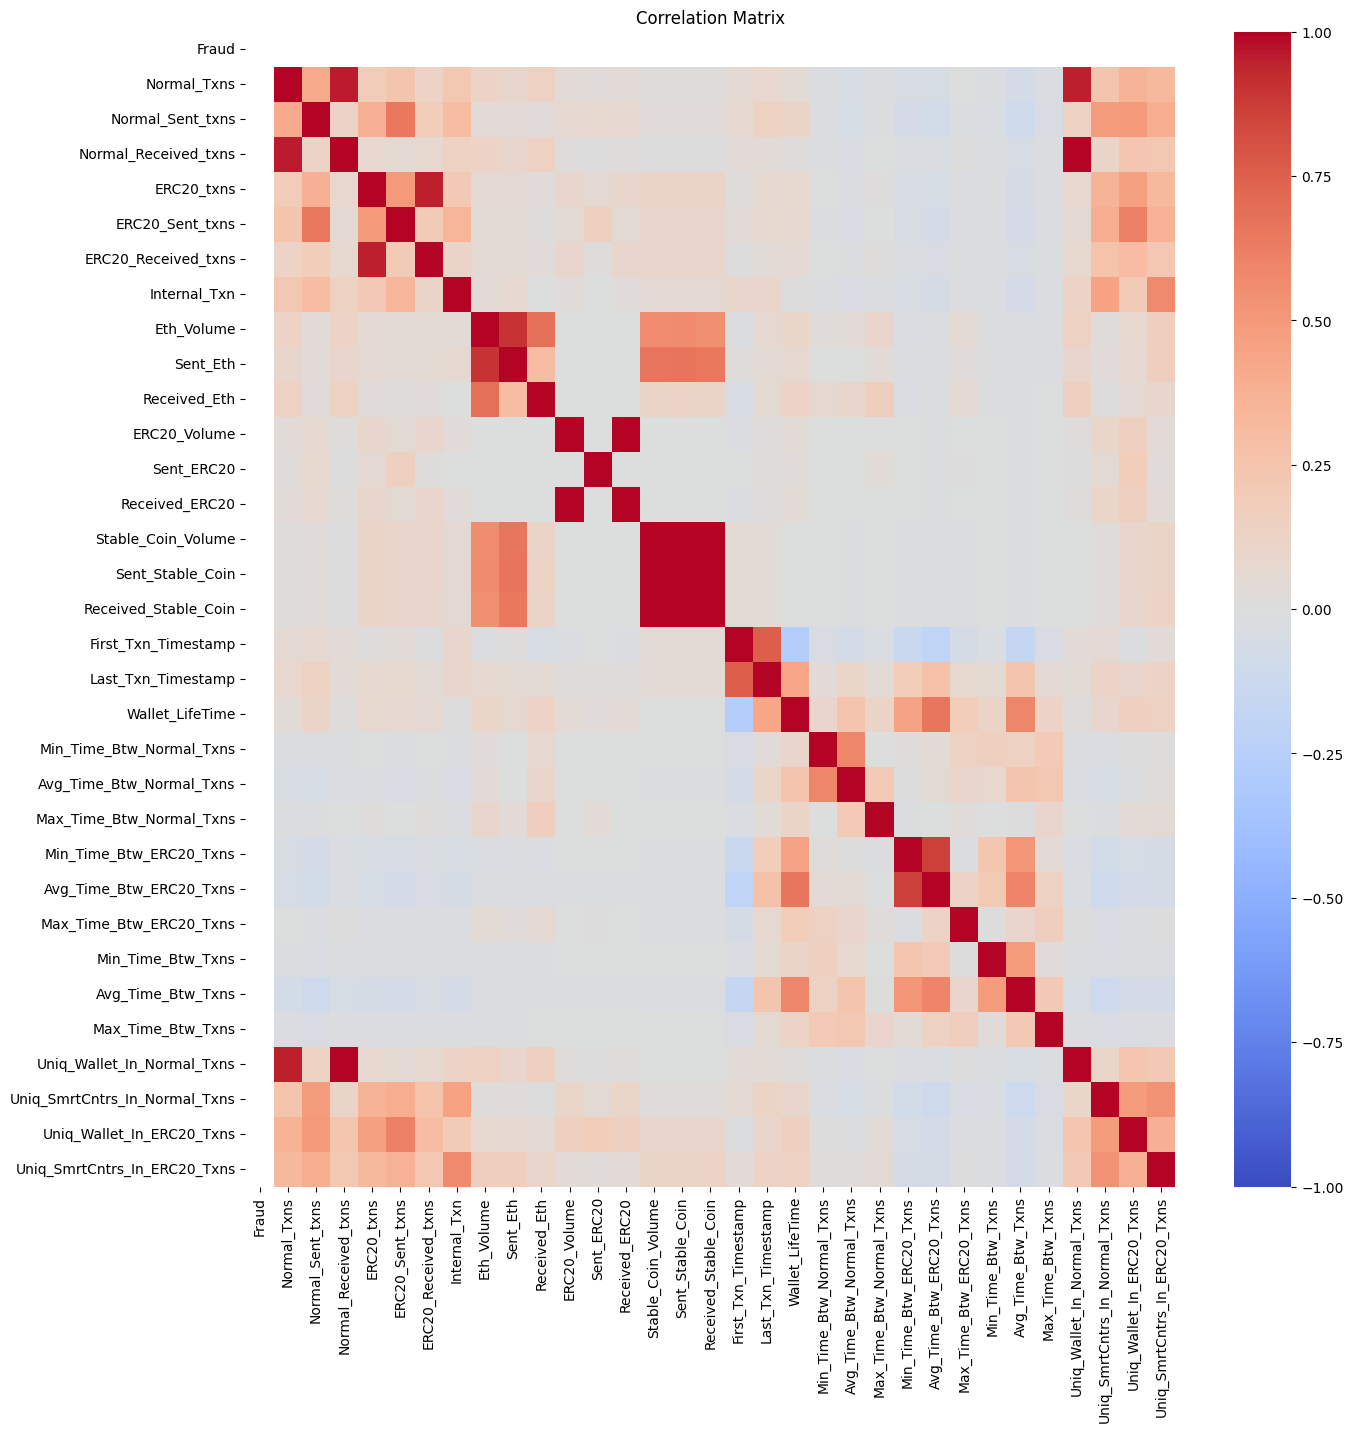

In [213]:
corr_matrix = data_fraud.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

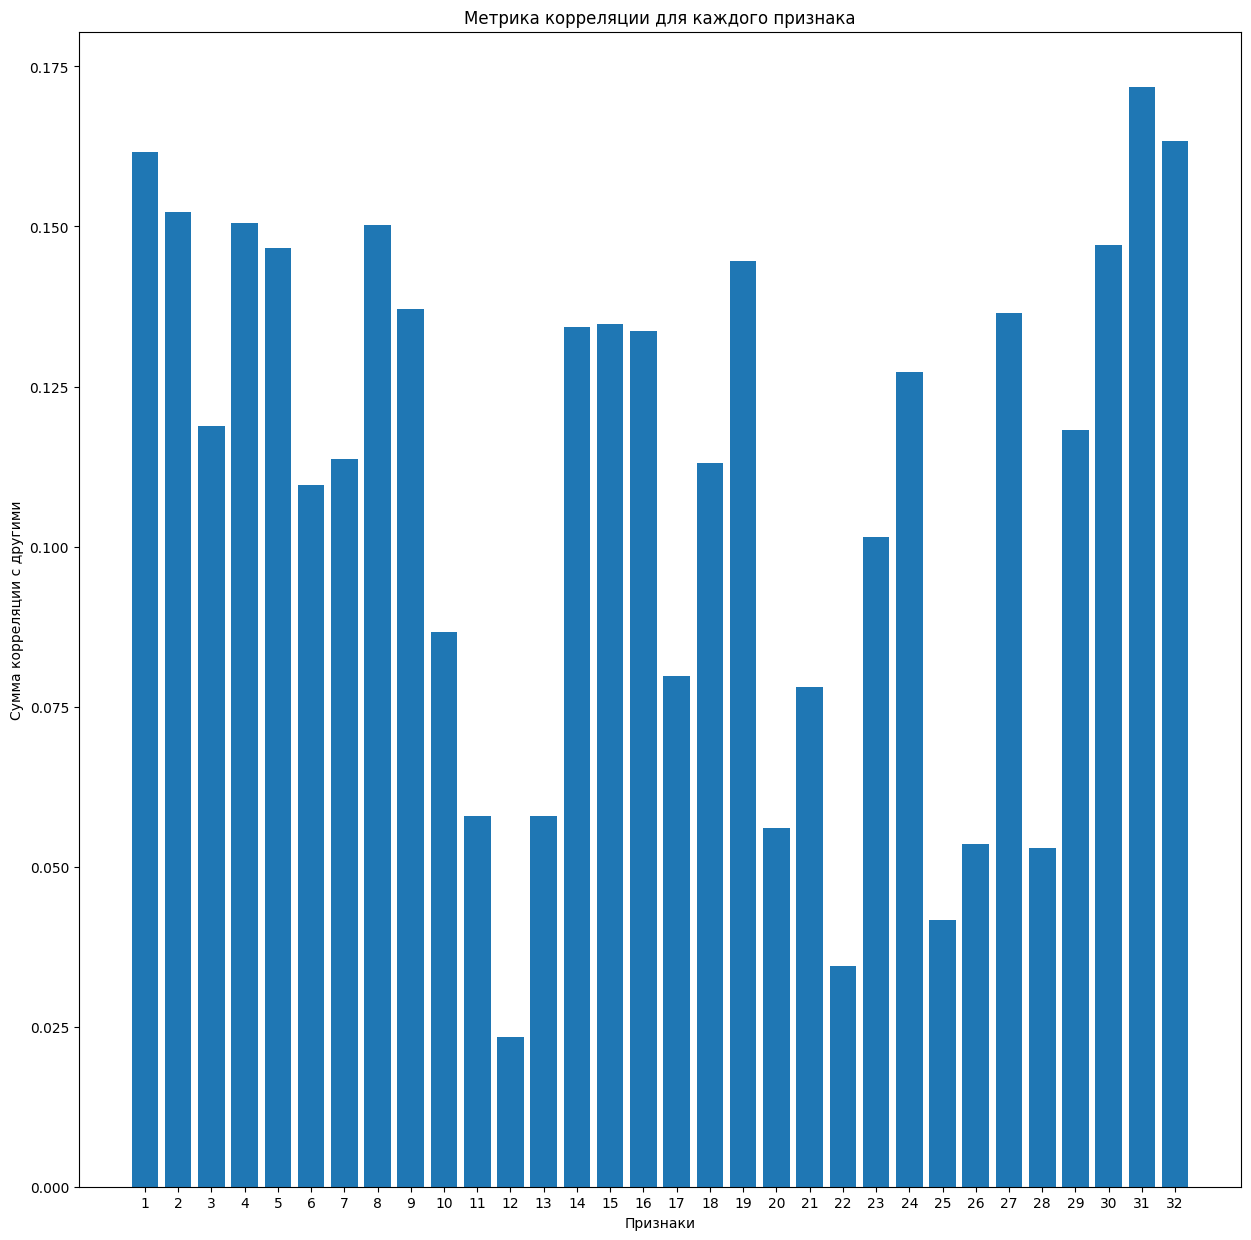

[('Normal_Txns', '1'),
 ('Normal_Sent_txns', '2'),
 ('Normal_Received_txns', '3'),
 ('ERC20_txns', '4'),
 ('ERC20_Sent_txns', '5'),
 ('ERC20_Received_txns', '6'),
 ('Internal_Txn', '7'),
 ('Eth_Volume', '8'),
 ('Sent_Eth', '9'),
 ('Received_Eth', '10'),
 ('ERC20_Volume', '11'),
 ('Sent_ERC20', '12'),
 ('Received_ERC20', '13'),
 ('Stable_Coin_Volume', '14'),
 ('Sent_Stable_Coin', '15'),
 ('Received_Stable_Coin', '16'),
 ('First_Txn_Timestamp', '17'),
 ('Last_Txn_Timestamp', '18'),
 ('Wallet_LifeTime', '19'),
 ('Min_Time_Btw_Normal_Txns', '20'),
 ('Avg_Time_Btw_Normal_Txns', '21'),
 ('Max_Time_Btw_Normal_Txns', '22'),
 ('Min_Time_Btw_ERC20_Txns', '23'),
 ('Avg_Time_Btw_ERC20_Txns', '24'),
 ('Max_Time_Btw_ERC20_Txns', '25'),
 ('Min_Time_Btw_Txns', '26'),
 ('Avg_Time_Btw_Txns', '27'),
 ('Max_Time_Btw_Txns', '28'),
 ('Uniq_Wallet_In_Normal_Txns', '29'),
 ('Uniq_SmrtCntrs_In_Normal_Txns', '30'),
 ('Uniq_Wallet_In_ERC20_Txns', '31'),
 ('Uniq_SmrtCntrs_In_ERC20_Txns', '32')]


In [214]:
short_names = {col: f'{i+1}' for i, col in enumerate(corr_matrix.columns[1:])}

metrics = []
for col in corr_matrix.columns[1:]:
    corr_sum = corr_matrix.drop(col)[col].abs().sum() / (len(corr_matrix.columns[1:]) - 1)
    metrics.append(corr_sum)

plt.figure(figsize=(15, 15))
plt.bar([short_names[col] for col in corr_matrix.columns[1:]], metrics)
plt.xlabel('Признаки')
plt.ylabel('Сумма корреляции с другими')
plt.title('Метрика корреляции для каждого признака')
plt.show()

pprint(sorted(short_names.items(), key=lambda cell: int(cell[1])))

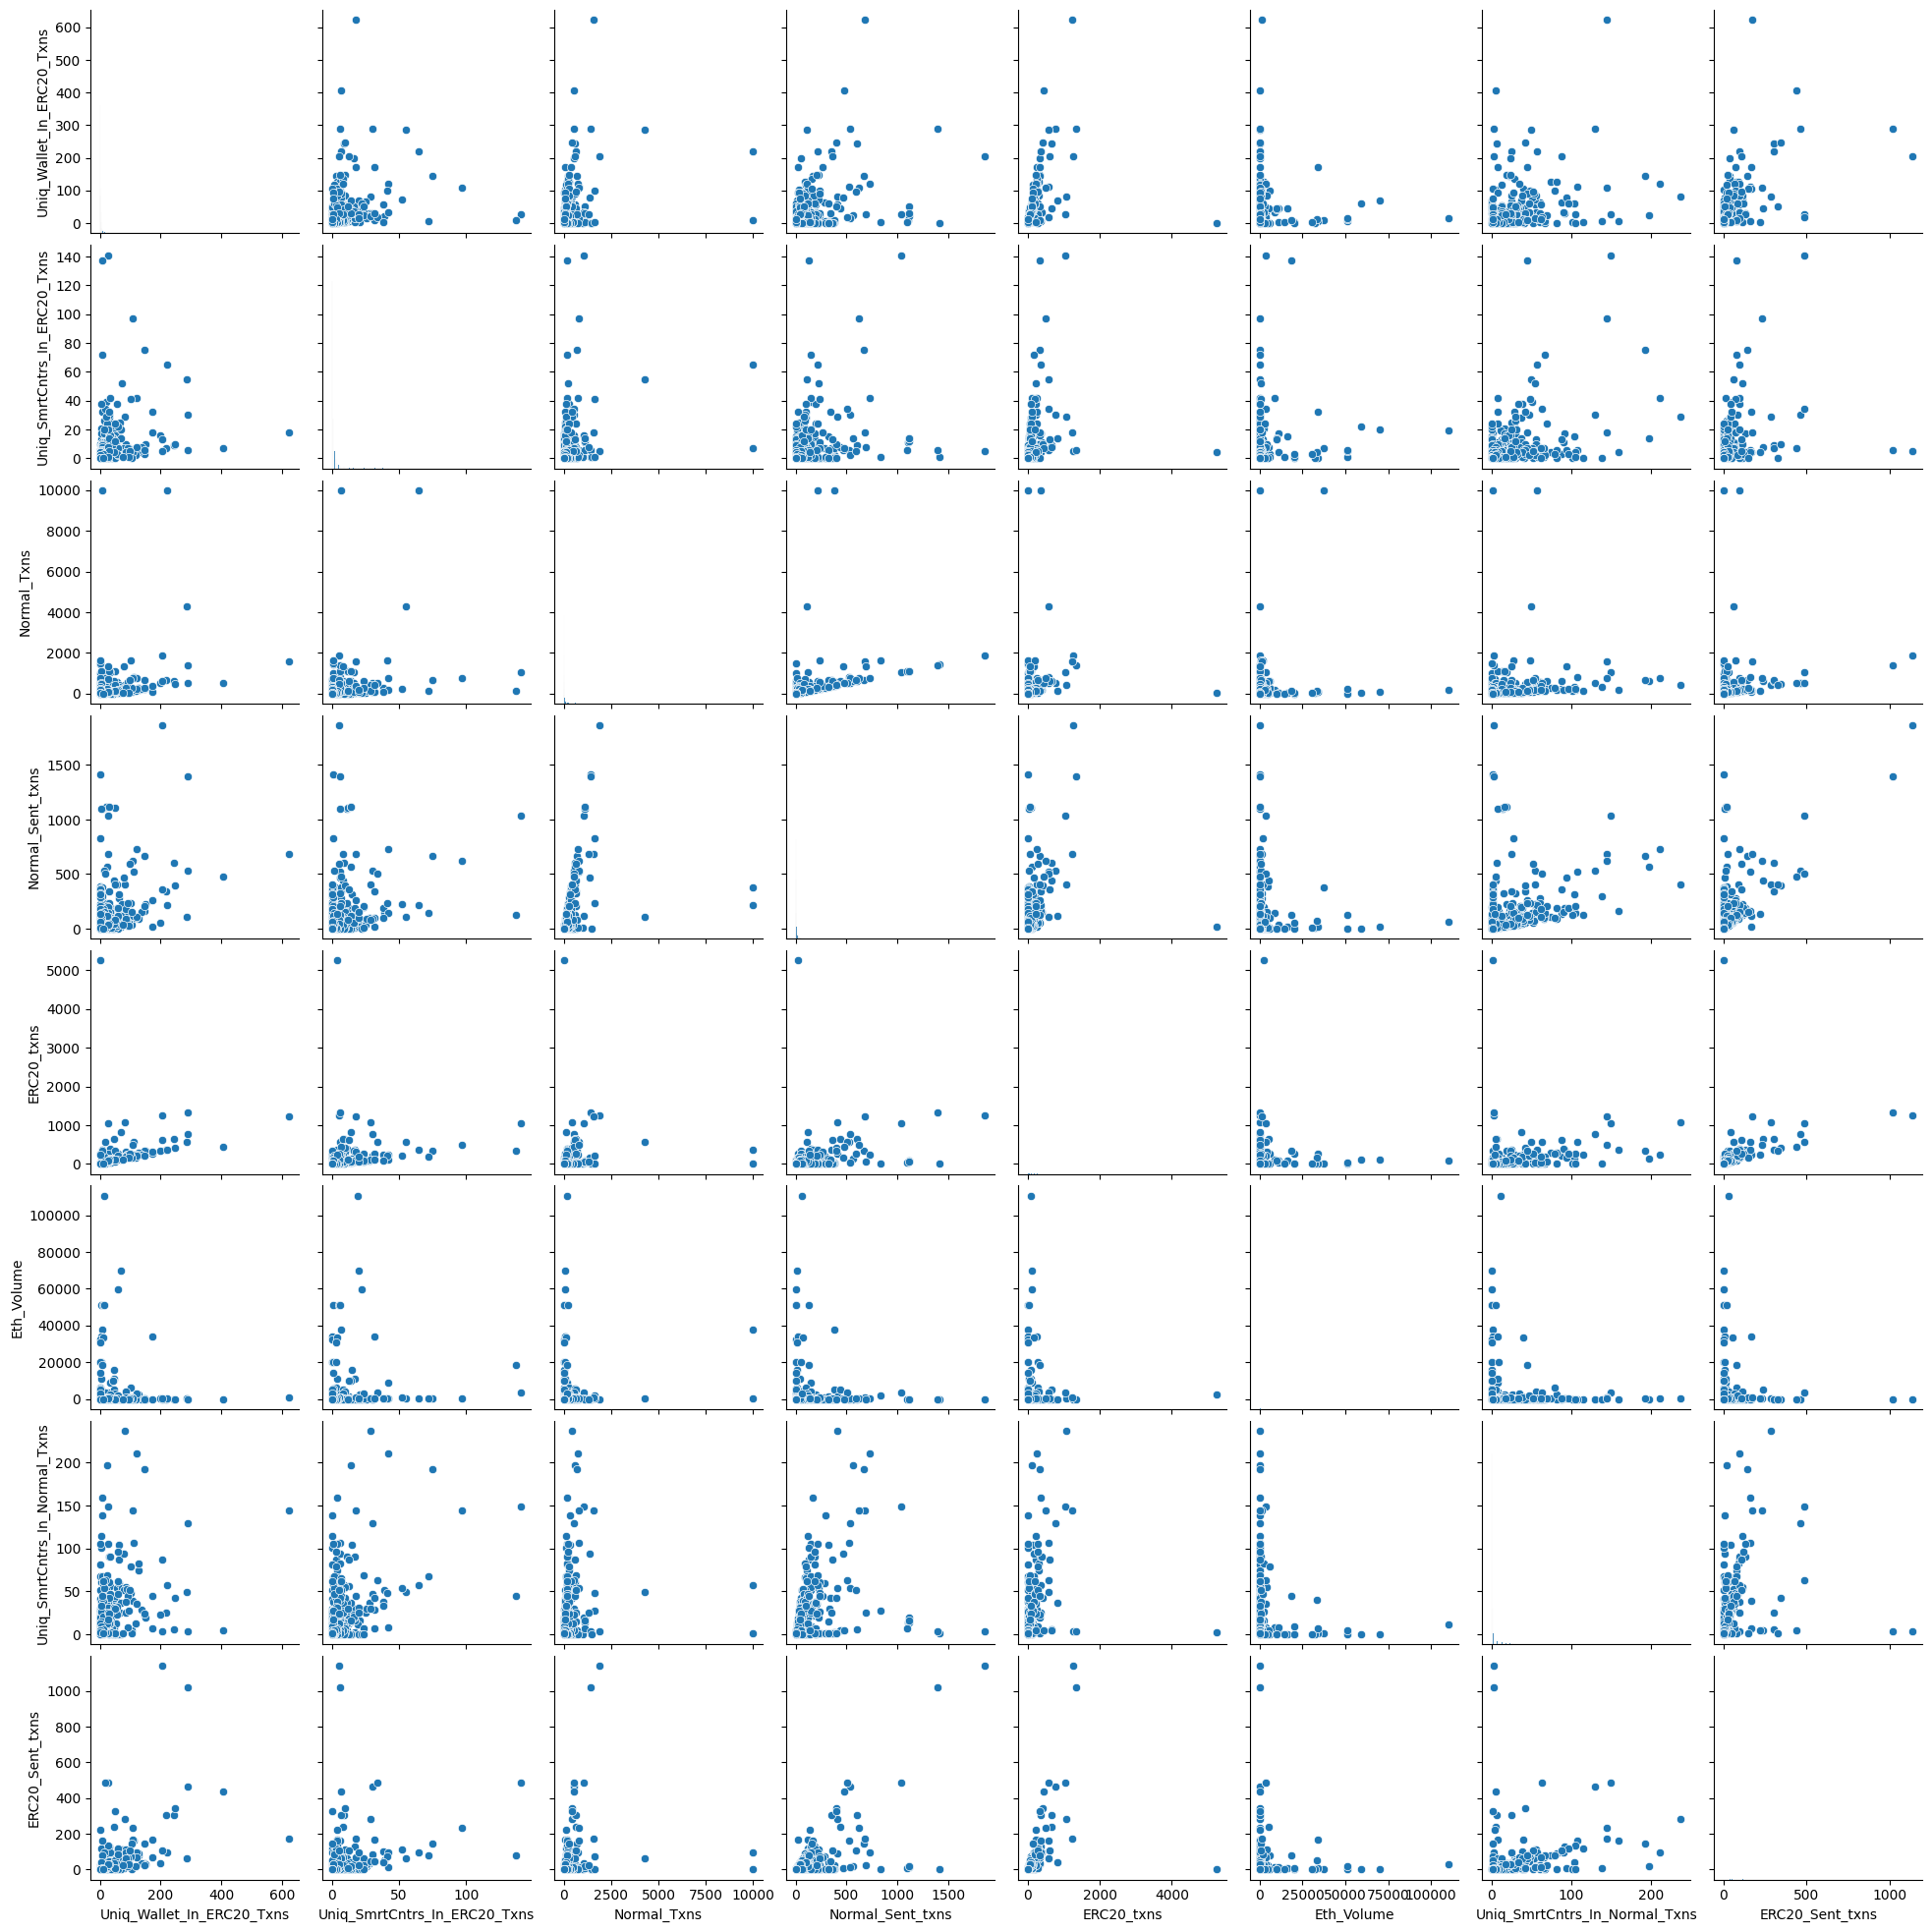

In [220]:
most_intr = [[col,corr_matrix.drop(col)[col].abs().sum() / (len(corr_matrix.columns[1:]) - 1)] for i, col in enumerate(corr_matrix.columns[1:])]
most_intr.sort(key=lambda cell: cell[1], reverse=True)

sns.pairplot(data[list(map(lambda cell: cell[0], most_intr[:int(len(corr_matrix.columns[1:])/4)]))])

In [ ]:
X = data[['feature1', 'feature2']]

# Преобразование t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

# Добавляем метки класса счета
data['class'] = np.where(data['класс счета'] == 'законный', 'законный', 'незаконный')
